

## Outcomes of gentrification: local changes to median income

<img src="https://cdn.theatlantic.com/assets/media/img/mt/2015/08/20720085886_db5d1f89e8_o/lead_720_405.jpg?mod=1533691764" width=500>

---

### **PART 1 - Loading and Working With the Census Data**


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install censusdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import all the required packages
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# package to extract census data
import censusdata

In [ ]:
# mount the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#  load the 2000 pre-cleaned 2000 median income data file into a dataframe
census_2000_median_income_df = pd.read_csv('/content/drive/MyDrive/census_income_2000.csv')

census_tract_2000_shapefiles_path = '/content/drive/MyDrive/2000'
census_tract_2016_shapefiles_path = '/content/drive/MyDrive/2016'

ct00 = gpd.read_file(census_tract_2000_shapefiles_path)
ct16 = gpd.read_file(census_tract_2016_shapefiles_path)


In [ ]:
# observe the dataframes
ct00

,AREA,PERIMETER,TR42_D00_,TR42_D00_I,STATE,COUNTY,TRACT,NAME,LSAD,LSAD_TRANS,geometry,GEOID
0,0.004057,0.398728,2,1,42,049,011701,0117.01,TR,NaN,"POLYGON ((-79.76214 42.24141, -79.77252 42.235...",42049011701
1,0.017494,0.558170,3,2,42,049,011702,0117.02,TR,NaN,"POLYGON ((-79.78063 42.23206, -79.77991 42.232...",42049011702
2,0.000370,0.090991,4,3,42,049,0116,0116,TR,NaN,"POLYGON ((-79.82202 42.21576, -79.82202 42.215...",42049011600
3,0.002350,0.228274,5,4,42,049,011505,0115.05,TR,NaN,"POLYGON ((-79.90727 42.20936, -79.90287 42.210...",42049011505
4,0.005081,0.348200,6,5,42,049,011507,0115.07,TR,NaN,"POLYGON ((-79.90047 42.18656, -79.90047 42.185...",42049011507
...,...,...,...,...,...,...,...,...,...,...,...,...
3142,0.000252,0.084906,3144,3143,42,055,0122,0122,TR,NaN,"POLYGON ((-77.57996 39.75687, -77.58633 39.750...",42055012200
3143,0.002813,0.304160,3145,3144,42,029,3068,3068,TR,NaN,"POLYGON ((-75.86815 39.74030, -75.86528 39.736...",42029306800
3144,0.001695,0.242311,3146,3145,42,055,012502,0125.02,TR,NaN,"POLYGON ((-77.46029 39.74365, -77.46004 39.736...",42055012502
3145,0.000383,0.115553,3147,3146,42,055,0124,0124,TR,NaN,"POLYGON ((-77.57768 39.75554, -77.57199 39.752...",42055012400


In [ ]:
ct16

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,42,101,010200,1400000US42101010200,42101010200,102,CT,360618,0,"POLYGON ((-75.23536 39.96851, -75.23570 39.970..."
1,42,101,011900,1400000US42101011900,42101011900,119,CT,690903,0,"POLYGON ((-75.23367 39.99188, -75.22566 39.991..."
2,42,101,013900,1400000US42101013900,42101013900,139,CT,562937,0,"POLYGON ((-75.17785 39.97425, -75.17378 39.974..."
3,42,101,015700,1400000US42101015700,42101015700,157,CT,485072,0,"POLYGON ((-75.13877 39.97932, -75.13814 39.982..."
4,42,101,016300,1400000US42101016300,42101016300,163,CT,572226,0,"POLYGON ((-75.13902 39.98876, -75.13835 39.991..."
...,...,...,...,...,...,...,...,...,...,...
3212,42,129,805000,1400000US42129805000,42129805000,8050,CT,40577425,57686,"POLYGON ((-79.75986 40.25241, -79.75621 40.253..."
3213,42,121,201400,1400000US42121201400,42121201400,2014,CT,273393108,2598355,"POLYGON ((-79.99978 41.31372, -79.99978 41.369..."
3214,42,125,743700,1400000US42125743700,42125743700,7437,CT,1064187,0,"POLYGON ((-80.22130 40.25623, -80.22016 40.254..."
3215,42,125,751200,1400000US42125751200,42125751200,7512,CT,13500577,0,"POLYGON ((-80.33256 40.20118, -80.33061 40.199..."


In [ ]:
""" read the ACS 5-year estimates for the median income for census tracts in
Philadelphia County using censusdata package """

# get the state code for Pennsylvania, which is the state for Philadelphia
censusdata.geographies(censusdata.censusgeo([("state", "*")]), "acs5", 2016)

{'Mississippi': censusgeo((('state', '28'),)),
 'Missouri': censusgeo((('state', '29'),)),
 'Montana': censusgeo((('state', '30'),)),
 'Nebraska': censusgeo((('state', '31'),)),
 'Nevada': censusgeo((('state', '32'),)),
 'New Hampshire': censusgeo((('state', '33'),)),
 'New Jersey': censusgeo((('state', '34'),)),
 'New Mexico': censusgeo((('state', '35'),)),
 'New York': censusgeo((('state', '36'),)),
 'North Carolina': censusgeo((('state', '37'),)),
 'North Dakota': censusgeo((('state', '38'),)),
 'Ohio': censusgeo((('state', '39'),)),
 'Oklahoma': censusgeo((('state', '40'),)),
 'Oregon': censusgeo((('state', '41'),)),
 'Pennsylvania': censusgeo((('state', '42'),)),
 'Rhode Island': censusgeo((('state', '44'),)),
 'South Carolina': censusgeo((('state', '45'),)),
 'South Dakota': censusgeo((('state', '46'),)),
 'Tennessee': censusgeo((('state', '47'),)),
 'Texas': censusgeo((('state', '48'),)),
 'Vermont': censusgeo((('state', '50'),)),
 'Utah': censusgeo((('state', '49'),)),
 'Virgin

In [ ]:
# we can see the state code for Pennsylvania is '42', now we will get all the
# county codes, to get Philadelphia county code
censusdata.geographies(censusdata.censusgeo([("state", "42"), ("county", "*")]), "acs5", 2016)

{'Pike County, Pennsylvania': censusgeo((('state', '42'), ('county', '103'))),
 'Snyder County, Pennsylvania': censusgeo((('state', '42'), ('county', '109'))),
 'Susquehanna County, Pennsylvania': censusgeo((('state', '42'), ('county', '115'))),
 'Crawford County, Pennsylvania': censusgeo((('state', '42'), ('county', '039'))),
 'Erie County, Pennsylvania': censusgeo((('state', '42'), ('county', '049'))),
 'Fulton County, Pennsylvania': censusgeo((('state', '42'), ('county', '057'))),
 'Juniata County, Pennsylvania': censusgeo((('state', '42'), ('county', '067'))),
 'Schuylkill County, Pennsylvania': censusgeo((('state', '42'), ('county', '107'))),
 'Wyoming County, Pennsylvania': censusgeo((('state', '42'), ('county', '131'))),
 'Adams County, Pennsylvania': censusgeo((('state', '42'), ('county', '001'))),
 'Delaware County, Pennsylvania': censusgeo((('state', '42'), ('county', '045'))),
 'Somerset County, Pennsylvania': censusgeo((('state', '42'), ('county', '111'))),
 'Cameron County

In [ ]:
# we need to download the acs5 data, for the year 2016, with the required column name
req_column_names = ['B19013_001E']

# above we have found that Pennsylvania state code is 42, and Philadelphia county code is 101.
# Data frame with data belonging to 'B19013_001E', and row index
# of censusgeo objects representing Census geographies
census_geo_df = censusdata.censusgeo([("state", "42"), ("county", "101"), ("tract", "*")])

acs_16_data = censusdata.download("acs5", 2016, census_geo_df, req_column_names)

In [ ]:
# observe the dataframe
acs_16_data

,B19013_001E
"Census Tract 83.01, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:008301",29770
"Census Tract 83.02, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:008302",31202
"Census Tract 63, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:006300",25871
"Census Tract 73, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:007300",25369
"Census Tract 79, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:007900",56944
...,...
"Census Tract 236, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:023600",67147
"Census Tract 239, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:023900",20843
"Census Tract 242, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:024200",22500
"Census Tract 245, Philadelphia County, Pennsylvania: Summary level: 140, state:42> county:101> tract:024500",16474


In [ ]:
# remove the existing 'censusgeo objects representing Census geographies' index
# and set the normal integer values starting from 0 as index
acs_16_data = acs_16_data.reset_index()

# rename the column name 'index'
acs_16_data = acs_16_data.rename(columns={'index':'census_geo_object'})

In [ ]:
acs_16_data

,census_geo_object,B19013_001E
0,"Census Tract 83.01, Philadelphia County, Penns...",29770
1,"Census Tract 83.02, Philadelphia County, Penns...",31202
2,"Census Tract 63, Philadelphia County, Pennsylv...",25871
3,"Census Tract 73, Philadelphia County, Pennsylv...",25369
4,"Census Tract 79, Philadelphia County, Pennsylv...",56944
...,...,...
379,"Census Tract 236, Philadelphia County, Pennsyl...",67147
380,"Census Tract 239, Philadelphia County, Pennsyl...",20843
381,"Census Tract 242, Philadelphia County, Pennsyl...",22500
382,"Census Tract 245, Philadelphia County, Pennsyl...",16474


In [ ]:
# as we need the unique geoid, which we don't have, we will create one
#  we have 'censusgeo objects representing Census geographies'
geo_obj = acs_16_data["census_geo_object"][0]

# print all the attributes of 'geo_obj' object
dir(geo_obj)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'geo',
 'hierarchy',
 'name',
 'params',
 'request',
 'sumlevel',
 'sumleveldict']

In [ ]:
# as we can see 'census_geo_object' contains geo attribute
geo_obj.geo

(('state', '42'), ('county', '101'), ('tract', '008301'))

In [ ]:
# change this

# -- create a GEOID from the first geography's "geo" attribute
geo_tup = geo_obj.geo
fgeoid = geo_tup[0][1] + geo_tup[1][1] + geo_tup[2][1]

print(fgeoid)

42101008301


In [ ]:
# -- define a function to create a GEOID from a geography
def make_geoid(geography):
  """ This function extracts the state number, county number, and tract number
  from a geography's "geo" attribute and combines them into a GEOID. """

  geo_tup = geography.geo
  geoid = int(geo_tup[0][1] + geo_tup[1][1] + geo_tup[2][1])

  return geoid

In [ ]:
# -- apply that function to every element of the "index" column
geoids = acs_16_data["census_geo_object"].apply(make_geoid)

print(geoids)

0      42101008301
1      42101008302
2      42101006300
3      42101007300
4      42101007900
          ...     
379    42101023600
380    42101023900
381    42101024200
382    42101024500
383    42101025400
Name: census_geo_object, Length: 384, dtype: int64


In [ ]:
# -- add those GEOIDs back into the data
acs_16_data["GEOID"] = geoids

acs_16_data.head()

,census_geo_object,B19013_001E,GEOID
0,"Census Tract 83.01, Philadelphia County, Penns...",29770,42101008301
1,"Census Tract 83.02, Philadelphia County, Penns...",31202,42101008302
2,"Census Tract 63, Philadelphia County, Pennsylv...",25871,42101006300
3,"Census Tract 73, Philadelphia County, Pennsylv...",25369,42101007300
4,"Census Tract 79, Philadelphia County, Pennsylv...",56944,42101007900


In [ ]:
# -- drop the original geographies
acs_16_data = acs_16_data.drop(columns=["census_geo_object"])

In [ ]:
# -- print out the final version of the data
print(acs_16_data)

     B19013_001E        GEOID
0          29770  42101008301
1          31202  42101008302
2          25871  42101006300
3          25369  42101007300
4          56944  42101007900
..           ...          ...
379        67147  42101023600
380        20843  42101023900
381        22500  42101024200
382        16474  42101024500
383        51806  42101025400

[384 rows x 2 columns]


In [ ]:
# load the precleaned data from google drive to compare it with our downlaoded data
pre_acs_16_data = pd.read_csv('/content/drive/MyDrive/census_income_2016.csv')

In [ ]:
pre_acs_16_data.describe()

,B19013_001E,GEOID
count,3.840000e+02,3.840000e+02
mean,-1.558264e+07,4.210105e+10
std,1.009971e+08,1.610293e+05
min,-6.666667e+08,4.210100e+10
25%,2.671500e+04,4.210101e+10
50%,3.888550e+04,4.210102e+10
75%,5.325225e+04,4.210103e+10
max,1.451040e+05,4.210199e+10


In [ ]:
acs_16_data.describe()

,B19013_001E,GEOID
count,3.840000e+02,3.840000e+02
mean,-1.558264e+07,4.210105e+10
std,1.009971e+08,1.610293e+05
min,-6.666667e+08,4.210100e+10
25%,2.671500e+04,4.210101e+10
50%,3.888550e+04,4.210102e+10
75%,5.325225e+04,4.210103e+10
max,1.451040e+05,4.210199e+10


In [ ]:
# before dropping the rows
print("number of rows before dropping", len(acs_16_data))

number of rows before dropping 384


In [ ]:
# Drop all rows for which the median income (column "B19013_001E") is equal to -666666666.

# B19013_001E is household income in the past 12 months for 'Philadelphia' county, 'E' says it is an estimate
acs_16_data = acs_16_data.drop(acs_16_data[acs_16_data['B19013_001E'] == -666666666].index)

In [ ]:
print("number of rows after dropping", len(acs_16_data))

number of rows after dropping 375


In [ ]:
census_2000_median_income_df.columns

Index(['Id2_2000', 'Median household income in 1999'], dtype='object')

In [ ]:
# replace 'Median household income in 1999' column name to 'income_2000' in "census_2000_median_income_df"
census_2000_median_income_df.rename(columns={'Median household income in 1999':
                                             'income_2000'}, inplace=True)

# replace "B19013_001E" to "income_2016" in acs_16_data
acs_16_data.rename(columns={'B19013_001E':'income_2016'}, inplace=True)


In [ ]:
# observe the column names after renaming columns
print(" 'census_2000_median_income_df table columns' \n", census_2000_median_income_df.columns)
print("\n'acs_16_data table columns'\n", acs_16_data.columns)

 'census_2000_median_income_df table columns' 
 Index(['Id2_2000', 'income_2000'], dtype='object')

'acs_16_data table columns'
 Index(['income_2016', 'GEOID'], dtype='object')


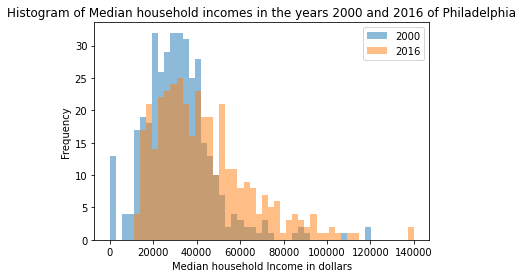

In [ ]:
# plot a histogram for 'census_2000_median_income_df' of 'income_2000'
plt.hist(census_2000_median_income_df['income_2000'], bins=50, range=(0, 140000),
         alpha=0.5, label="2000")

# plot a histogram for 'acs_16_data' of 'income_2016'
plt.hist(acs_16_data['income_2016'], bins=50, range=(0, 140000), alpha=0.5,
         label="2016")

plt.xlabel('Median household Income in dollars')
plt.ylabel('Frequency')
plt.title('Histogram of Median household incomes in the years 2000 and 2016 of Philadelphia')
# plot the legend for the histograms
plt.legend()
plt.show()

In [ ]:
# ratio between the mean 2016 income and mean 2000 income
mean_income_ratio = acs_16_data['income_2016'].mean() / census_2000_median_income_df['income_2000'].mean()

In [ ]:
print(mean_income_ratio)

1.3745383512580667


In [ ]:
# create "income_2000_adj" column in "median_income20_df" which is "income_2000 * mean_income_ratio"
census_2000_median_income_df['income_2000_adj'] = census_2000_median_income_df['income_2000'] * mean_income_ratio

In [ ]:
# test if both "income_2016" and "income_2000_adj" means are same
print("mean of income_2016       ", acs_16_data['income_2016'].mean())
print("mean of income_2000_adj    ", census_2000_median_income_df['income_2000_adj'].mean())

mean of income_2016        43380.21333333333
mean of income_2000_adj     43380.21333333334


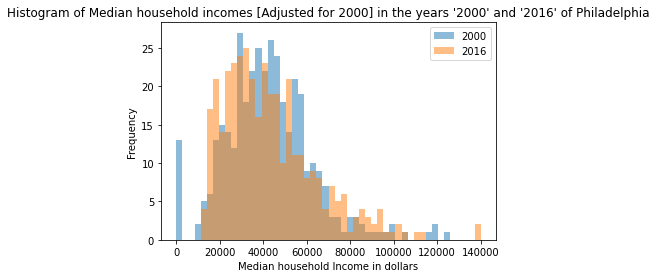

In [ ]:
# plot a histogram for 'census_2000_median_income_df' of 'income_2000'
plt.hist(census_2000_median_income_df['income_2000_adj'], bins=50, range=(0, 140000),
         alpha=0.5, label="2000")

# plot a histogram for 'acs_16_data' of 'income_2016'
plt.hist(acs_16_data['income_2016'], bins=50, range=(0, 140000), alpha=0.5,
         label="2016")

plt.xlabel('Median household Income in dollars')
plt.ylabel('Frequency')
plt.title("Histogram of Median household incomes [Adjusted for 2000] in the years '2000' and '2016' of Philadelphia")
# plot the legend for the histograms
plt.legend()
plt.show()

### **PART 2 - Merging and Visualizing the Data**

In [ ]:
census_2000_median_income_df

,Id2_2000,income_2000,income_2000_adj
0,42101000100,48886.0,67195.681840
1,42101000200,8349.0,11476.020695
2,42101000300,40625.0,55840.620520
3,42101000400,27400.0,37662.350824
4,42101000500,9620.0,13223.058939
...,...,...,...
375,42101036302,47995.0,65970.968169
376,42101036303,53614.0,73694.499164
377,42101036400,51250.0,70445.090502
378,42101036500,50447.0,69341.336206


In [ ]:
# rename 'Id2_2000' column to 'GEOID' in census_2000_median_income_df
census_2000_median_income_df = census_2000_median_income_df.rename( \
    columns={'Id2_2000':'GEOID'}).astype({'GEOID': int})

# verify the datatypes of 'GEOID' of both dataframes
print("2016 geoid type", type(acs_16_data['GEOID'][0]))
print("2020 geoid type", type(census_2000_median_income_df['GEOID'][0]))

2016 geoid type <class 'numpy.int64'>
2020 geoid type <class 'numpy.int64'>


In [ ]:
# there is no GEOID column in ct00 dataframe.
# create 'GEOID' column in 'ct00' geo dataframe by concatinating values of
# STATE, COUNTY and TRACT columns

tract = ct00['TRACT']
tract = tract + "00"
tract = tract.str[:6]

ct00['GEOID'] = ct00['STATE'] + ct00['COUNTY'] + tract


# convert the string datatype of 'GEOID' to integer datatype in both the geodataframes
ct00['GEOID'] = ct00['GEOID'].astype(int)
ct16['GEOID'] = ct16['GEOID'].astype(int)

In [ ]:
print('GEOID type in ct16', type(ct16['GEOID'][0]))
print('GEOID type in ct00', type(ct00['GEOID'][0]))

GEOID type in ct16 <class 'numpy.int64'>
GEOID type in ct00 <class 'numpy.int64'>


In [ ]:
# observe the geo  dataframe before merging
ct00

,AREA,PERIMETER,TR42_D00_,TR42_D00_I,STATE,COUNTY,TRACT,NAME,LSAD,LSAD_TRANS,geometry,GEOID
0,0.004057,0.398728,2,1,42,049,011701,0117.01,TR,NaN,"POLYGON ((-79.76214 42.24141, -79.77252 42.235...",42049011701
1,0.017494,0.558170,3,2,42,049,011702,0117.02,TR,NaN,"POLYGON ((-79.78063 42.23206, -79.77991 42.232...",42049011702
2,0.000370,0.090991,4,3,42,049,0116,0116,TR,NaN,"POLYGON ((-79.82202 42.21576, -79.82202 42.215...",42049011600
3,0.002350,0.228274,5,4,42,049,011505,0115.05,TR,NaN,"POLYGON ((-79.90727 42.20936, -79.90287 42.210...",42049011505
4,0.005081,0.348200,6,5,42,049,011507,0115.07,TR,NaN,"POLYGON ((-79.90047 42.18656, -79.90047 42.185...",42049011507
...,...,...,...,...,...,...,...,...,...,...,...,...
3142,0.000252,0.084906,3144,3143,42,055,0122,0122,TR,NaN,"POLYGON ((-77.57996 39.75687, -77.58633 39.750...",42055012200
3143,0.002813,0.304160,3145,3144,42,029,3068,3068,TR,NaN,"POLYGON ((-75.86815 39.74030, -75.86528 39.736...",42029306800
3144,0.001695,0.242311,3146,3145,42,055,012502,0125.02,TR,NaN,"POLYGON ((-77.46029 39.74365, -77.46004 39.736...",42055012502
3145,0.000383,0.115553,3147,3146,42,055,0124,0124,TR,NaN,"POLYGON ((-77.57768 39.75554, -77.57199 39.752...",42055012400


In [ ]:
# observe the geo dataframe before merging
ct16

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,42,101,010200,1400000US42101010200,42101010200,102,CT,360618,0,"POLYGON ((-75.23536 39.96851, -75.23570 39.970..."
1,42,101,011900,1400000US42101011900,42101011900,119,CT,690903,0,"POLYGON ((-75.23367 39.99188, -75.22566 39.991..."
2,42,101,013900,1400000US42101013900,42101013900,139,CT,562937,0,"POLYGON ((-75.17785 39.97425, -75.17378 39.974..."
3,42,101,015700,1400000US42101015700,42101015700,157,CT,485072,0,"POLYGON ((-75.13877 39.97932, -75.13814 39.982..."
4,42,101,016300,1400000US42101016300,42101016300,163,CT,572226,0,"POLYGON ((-75.13902 39.98876, -75.13835 39.991..."
...,...,...,...,...,...,...,...,...,...,...
3212,42,129,805000,1400000US42129805000,42129805000,8050,CT,40577425,57686,"POLYGON ((-79.75986 40.25241, -79.75621 40.253..."
3213,42,121,201400,1400000US42121201400,42121201400,2014,CT,273393108,2598355,"POLYGON ((-79.99978 41.31372, -79.99978 41.369..."
3214,42,125,743700,1400000US42125743700,42125743700,7437,CT,1064187,0,"POLYGON ((-80.22130 40.25623, -80.22016 40.254..."
3215,42,125,751200,1400000US42125751200,42125751200,7512,CT,13500577,0,"POLYGON ((-80.33256 40.20118, -80.33061 40.199..."


In [ ]:
# create 'inc00sh' dataframe by merging 2000 census tract GeoDataFrame and 2000 income data
inc00sh = ct00.merge(census_2000_median_income_df, on='GEOID')

# create 'inc16sh' dataframe by merging 2016 census tract GeoDataFrame and 2016 income data
inc16sh = ct16.merge(acs_16_data, on='GEOID')

In [ ]:
inc00sh

,AREA,PERIMETER,TR42_D00_,TR42_D00_I,STATE,COUNTY,TRACT,NAME,LSAD,LSAD_TRANS,geometry,GEOID,income_2000,income_2000_adj
0,0.000382,0.101891,2168,2167,42,101,0365,0365,TR,NaN,"POLYGON ((-74.99801 40.12761, -74.99341 40.132...",42101036500,50447.0,69341.336206
1,0.000186,0.056434,2186,2185,42,101,0358,0358,TR,NaN,"POLYGON ((-75.02491 40.12891, -75.02011 40.126...",42101035800,54449.0,74842.238688
2,0.000489,0.108181,2200,2199,42,101,0364,0364,TR,NaN,"POLYGON ((-74.97981 40.11971, -74.97541 40.120...",42101036400,51250.0,70445.090502
3,0.000237,0.067885,2201,2200,42,101,0359,0359,TR,NaN,"POLYGON ((-75.01531 40.12361, -75.01172 40.121...",42101035900,43582.0,59905.130425
4,0.000218,0.062643,2212,2211,42,101,0357,0357,TR,NaN,"POLYGON ((-75.03762 40.12001, -75.03672 40.120...",42101035700,34047.0,46798.907245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.000286,0.098508,3009,3008,42,101,0051,0051,TR,NaN,"POLYGON ((-75.17362 39.90521, -75.17477 39.898...",42101005100,28417.0,39060.256328
376,0.000087,0.036964,3023,3022,42,101,0056,0056,TR,NaN,"POLYGON ((-75.24053 39.90361, -75.23893 39.898...",42101005600,21801.0,29966.310596
377,0.000808,0.152581,3027,3026,42,101,0050,0050,TR,NaN,"POLYGON ((-75.18982 39.89661, -75.18742 39.896...",42101005000,0.0,0.000000
378,0.000254,0.067798,3029,3028,42,101,0054,0054,TR,NaN,"POLYGON ((-75.25523 39.89871, -75.25253 39.897...",42101005400,40577.0,55774.642679


In [ ]:
inc16sh

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,income_2016
0,42,101,010200,1400000US42101010200,42101010200,102,CT,360618,0,"POLYGON ((-75.23536 39.96851, -75.23570 39.970...",16071
1,42,101,011900,1400000US42101011900,42101011900,119,CT,690903,0,"POLYGON ((-75.23367 39.99188, -75.22566 39.991...",30854
2,42,101,013900,1400000US42101013900,42101013900,139,CT,562937,0,"POLYGON ((-75.17785 39.97425, -75.17378 39.974...",14314
3,42,101,015700,1400000US42101015700,42101015700,157,CT,485072,0,"POLYGON ((-75.13877 39.97932, -75.13814 39.982...",38991
4,42,101,016300,1400000US42101016300,42101016300,163,CT,572226,0,"POLYGON ((-75.13902 39.98876, -75.13835 39.991...",14017
...,...,...,...,...,...,...,...,...,...,...,...
370,42,101,033000,1400000US42101033000,42101033000,330,CT,732828,0,"POLYGON ((-75.04059 40.03686, -75.03929 40.037...",38070
371,42,101,034400,1400000US42101034400,42101034400,344,CT,3399171,13905,"POLYGON ((-75.06946 40.09441, -75.05834 40.105...",85058
372,42,101,036000,1400000US42101036000,42101036000,360,CT,2043083,638,"POLYGON ((-75.02393 40.10070, -75.00539 40.114...",53708
373,42,101,036900,1400000US42101036900,42101036900,369,CT,1855494,193283,"POLYGON ((-75.20784 39.94129, -75.20506 39.943...",44464


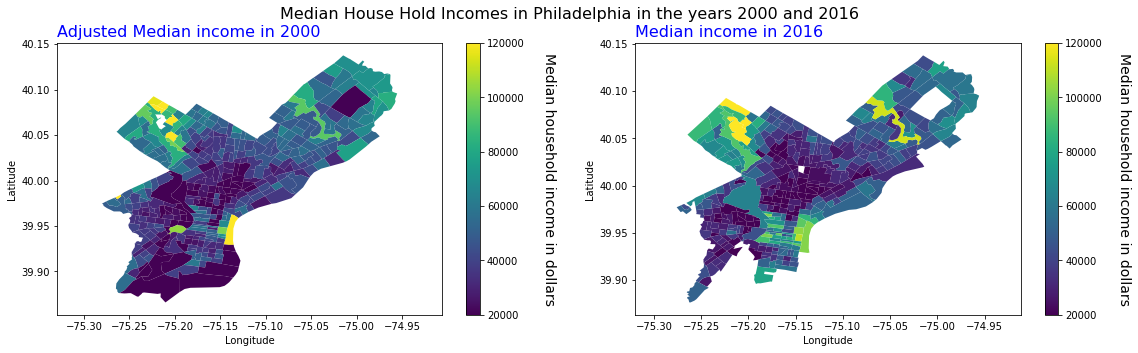

In [ ]:
# make a choropleth for 2000 incomes geodataframe
fig, ax = plt.subplots(1, 2, figsize=[19, 5])

# the colormap as 'viridis' and the minimum as 20000 dollars and max as 120000 dollars
inc00sh.plot("income_2000_adj", legend=True,  cmap='viridis', vmin=20000, vmax=120000, ax=ax[0])

# sets the aspect ratio of the plot to be equal along both the x-axis and the y-axis.
ax[0].axis("equal")

ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
# set the title for the figure
ax[0].set_title("Adjusted Median income in 2000", loc="left", fontsize=16, color="blue")
# add title to the color bar
fig.text(0.48, 0.5, "Median household income in dollars",
         va="center", rotation=270, fontsize=14)

fig.show()

# make a choropleth for 2016 incomes geodataframe

# the colormap as 'viridis' and the minimum as 20000 dollars and max as 120000 dollars
inc16sh.plot("income_2016", legend=True,  cmap='viridis', vmin=20000, vmax=120000, ax=ax[1])

# sets the aspect ratio of the plot to be equal along both the x-axis and the y-axis.
ax[1].axis("equal")
# set and y axis labels
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

# set the title for the figure
ax[1].set_title("Median income in 2016", loc="left", fontsize=16, color="blue")

# add title to the color bar
fig.text(0.9, 0.5, "Median household income in dollars",
         va="center", rotation=270, fontsize=14)

# Add the title to both of the maps
fig.suptitle("Median House Hold Incomes in Philadelphia in the years 2000 and 2016", fontsize=16)

fig.show()

### **PART 3 - Interpolating the 2000 data on 2016 Locations**

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [ ]:
# create the features and target for the year 2000
feat = pd.DataFrame()

feat["longitude"] = inc00sh.centroid.x
feat["latitude"] = inc00sh.centroid.y

# "target"
targ = inc00sh["income_2000_adj"]

In [ ]:
feat

,longitude,latitude
0,-75.006448,40.126426
1,-75.025337,40.120992
2,-74.986356,40.112693
3,-75.016999,40.111960
4,-75.034528,40.111884
...,...,...
375,-75.190845,39.900446
376,-75.244883,39.898418
377,-75.170224,39.889520
378,-75.255533,39.887708


In [ ]:
targ

0      69341.336206
1      74842.238688
2      70445.090502
3      59905.130425
4      46798.907245
           ...     
375    39060.256328
376    29966.310596
377        0.000000
378    55774.642679
379        0.000000
Name: income_2000_adj, Length: 380, dtype: float64

Text(0, 0.5, 'latitude')

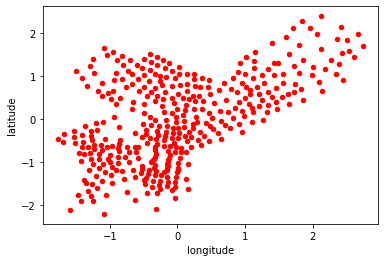

In [ ]:
# standardizing the features and target
feat_st = (feat - feat.mean()) / feat.std()

targ_st = (targ - targ.mean()) / targ.std()

# plot the feat latitude and longitude values, just to check the shape wether if it is same as old
plt.scatter(feat_st["longitude"], feat_st["latitude"], c="r", s=20)
plt.xlabel("longitude")
plt.ylabel("latitude")

In [ ]:
# Fit a GPR model to the standardized 2000 data (remember to intialize the kernel)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

gpr.fit(feat_st, targ_st)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10)

The model has now been fit to the 2000 adjusted median income data at the 2000 census tract locations.  Now we want to interpolate onto the 2016 positions.

<b> Create a features for the 2016 census tract positions making sure to standardize. </b>

In [ ]:
# create a data frame
feat_pred = pd.DataFrame()
# make the latitude and longitude columns
feat_pred["longitude"] = inc16sh.centroid.x
feat_pred["latitude"] = inc16sh.centroid.y

# standardize
feat_pred_st = (feat_pred - feat.mean()) / feat.std()

<ipython-input-614-b5a1a86eceb1>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  feat_pred["longitude"] = inc16sh.centroid.x
<ipython-input-614-b5a1a86eceb1>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  feat_pred["latitude"] = inc16sh.centroid.y


<b> Interpolate the trained model onto these positions using the `.predict()` method. </b>

In [ ]:
# predict the values to interpolate them
inc16pred_st = gpr.predict(feat_pred_st)

In [ ]:
inc16pred_st

array([-6.44149896e-01, -1.74664558e-01, -1.13925685e+00, -5.83027506e-01,
       -9.63490304e-01, -7.13082579e-01, -9.80179515e-01, -1.20508110e+00,
       -6.12802219e-01,  5.59792700e-01, -2.16285067e-01, -1.58295805e-01,
        1.12040891e+00, -2.00088180e-01, -6.25452470e-01,  8.81157384e-02,
        1.07637682e-01,  7.26618602e-01,  6.82617353e-01,  8.77968726e-01,
        8.57521594e-02,  6.57404161e-01,  1.58805771e+00,  1.02781755e+00,
        1.34205575e-01,  1.07996349e+00, -4.62808721e-01, -3.42810184e-01,
       -1.09673728e+00, -1.97579538e-01, -8.41347970e-01, -4.08972470e-01,
        8.07094972e-01, -1.88225017e-02,  4.84045982e-01, -1.16298923e+00,
       -1.37365261e+00, -8.87097124e-02, -1.92888037e-01,  1.53336778e+00,
        1.90176490e-01,  3.08007708e-01, -7.23118529e-02, -7.40221300e-01,
        1.27922774e-01, -1.22790990e-03,  1.19050520e-01,  3.94654184e-01,
        1.21430791e-01, -2.35458877e-01, -2.77510162e-03,  5.71361961e-01,
        4.15225940e-01,  

<b> Unstandardize these values so that they are real dollars and put those into a column in `inc16sh` called `"income_2000_interp"`. </b>

In [ ]:
# unstandardize the standardized predcited values with target values
inc16sh["income_2000_interp"] = inc16pred_st * targ.std() + targ.mean()

So now we have a column of interpolated values of the 2000 adjusted incomes at the locations of the 2016 census tracts.

<b> Make a map of the difference between the 2016 median income and the adjusted 2000 median income using the `coolwarm` color map, `vmin=-20000` and `vmax=20000`. </b>

In [ ]:
inc16sh['predicted_inc_2000'] = inc16sh["income_2016"] - inc16sh["income_2000_interp"]

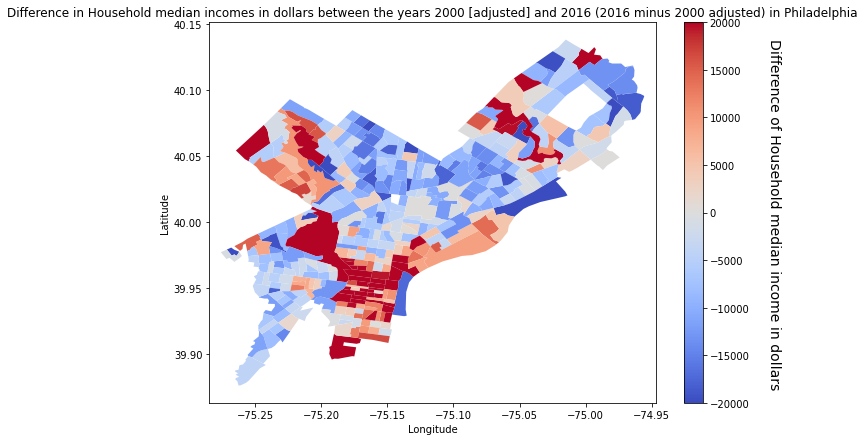

In [ ]:
# make a choropleth for 2016 incomes geodataframe
fig, ax = plt.subplots(figsize=[10, 7])

# the colormap as 'viridis' and the minimum as 20000 dollars and max as 120000 dollars
inc16sh.plot("predicted_inc_2000", legend=True,  cmap='coolwarm', vmin=-20000, vmax=20000, ax=ax)

# sets the aspect ratio of the plot to be equal along both the x-axis and the y-axis.
ax.axis("equal")
# set and y axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# set the title for the figure
ax.set_title("Difference in Household median incomes in dollars between the years 2000 [adjusted]" \
      " and 2016 (2016 minus 2000 adjusted) in Philadelphia")

# add title to the color bar
fig.text(0.9, 0.5, "Difference of Household median income in dollars",
         va="center", rotation=270, fontsize=14)

fig.show()

### **PART 4 - Context and Conclusions**

**Philedelphia Difference in Fraction of white Residents from the year 2000 to 2016**

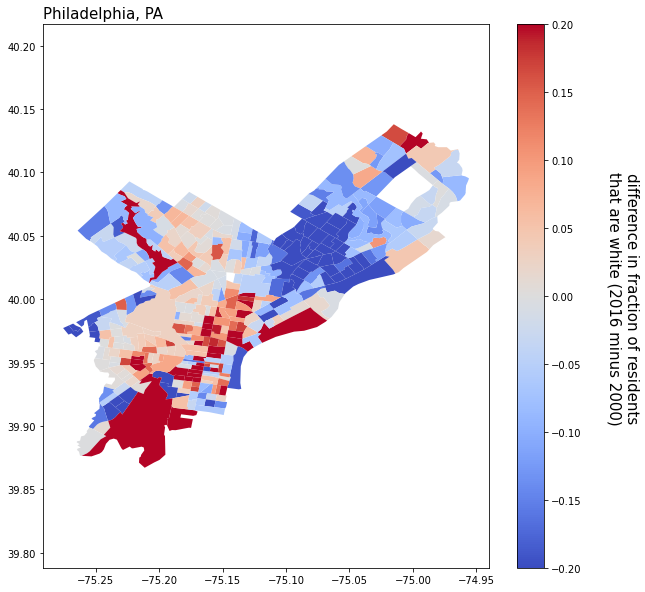

The above map of Philadelphia specifies the difference in household median incomes in dollars between the years 2000 and 2016. The other attached image specifies the difference in the fraction of white residents between the years 2000 and 2016.


By ignoring the Assumptions we have made in this process, There are a lot of color differences between the two maps, stating that there is less relationship between the white residents increases and decreases that affected the median household income between the years 2000 and 2016. But, there are certain areas where there is a similarity between household incomes and the increase in white people.


We will see the areas where both household income and white residents increased.


Somerton, which is located in the northeast section of Philadelphia, Whitman, Bella Vista, which is located in the south part, and Rittenhouse, Point Breeze, Fishtown, and some other parts of Center City have experienced increases in both the number of white residents and household incomes.


The areas that saw a decline in household incomes with a decrease in white population are Mantua, Carroll Park, Belmont, and Haddington, mostly the areas located in the west of the Schuylkill River.



The areas that didn't get a significant increase or decrease in both white residents and household median incomes are Holmesburg, some parts of Eastwick, Cobbs Creek, and Pennsport.



Conversely, the areas that saw a decrease in the number of white residents with an increase in median household income are those in the Northwest section, namely Roxborough and Mount Airy. Rhawnhurst, Mayfair, Bustleton, some parts of Pennypack in the NorthEast Section, and Kensington, Harrowgate, and Port Richmond in the eastern part of Philadelphia also experienced a similar pattern.


These are the mostly visible areas where the similar patterns between both the fraction of white residents and the difference in household incomes between 2000 and 2016 are observed. The similarities are not limited to a particular region and are visible in some parts of Philadelphia.


"Gentrification" is one of the reasons for the similarities.
Gentrification refers to the migration of people who have lived in a particular area for a long time because of the infrastructure developments, increase in businesses, property values, common goods, etc. These increases in prices forced the long-term residents, who have low income, are uneducated, and are working class, to shift to other places, leaving their area to rich people.


According to the findings, gentrification may have occurred in areas such as Rittenhouse, Point Breeze, Fishtown, and Somerton, which have increased in both household incomes and the number of white people in Philadelphia, as a result of a significant increase in infrastructure investments, the growth of industries, and the increased number of businesses across sectors such as technology, finance, education, and hospitals, which increased house rents, transportation costs, and crime rates.
There are both pros and cons to gentrification, and there is a need for policies to mitigate its effects.


The advantages of the advancement of human technology are often represented in the development of an area; thus, highly developed areas, states, and countries are desirable. The developed infrastructure and advancements in technology both help with the increase in standard of living, business development, and creation of knowledge-based jobs, which happened in some places like Rittenhouse, Point Breeze, Fishtown, and Somerton in Philadelphia and led to the drastic increase in white residents.


The consequences are that the development of an area mostly doesn't have an end, and as development is increased, low-income, poor people are forced to migrate because of the increase in the cost of living, which affects long-time residents lives both socially and culturally.

Overall, the spatial similarity between this map of median house hold income increase and the map of 2000 to 2016 demographic differences states in Philedelphia suggests that gentrification has both positive and negative effects but there is vital need for policy makers to reduce its adverse affects, as people loosing their own homes in which they had lived with their ancestors through their life time and with lot of memories is not a small thing.